https://www.kaggle.com/c/nlp-getting-started

First Attempt
- Used a Linear Model with Ridge Regression
    - Tokenized the training set using Count Vectorizer
    - Used Ridge Regression Classifier to learn on the training set
    - Used cross validation to assess accuracy on various parts of training set
        - Averaged 60% accuracy (10% better than random)
    - Tokenized the testing set with training vectorizer 
        - Used learned ridge regression classifier to predict on test set 
            - How Ridge Regression differs from Linear
                - https://www.youtube.com/watch?v=OEU22e20tWw
                - Uses an alpha to generalize the line of best fit so that it doesn't overfit to the training data 
                
Second Attempt

- Used a Linear Model with Ridge Regression
    - Tokenized the training set using tfidf vecotorizer
        - https://www.quora.com/How-does-TfidfVectorizer-work-in-laymans-terms
        - https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XnlXaVNKhQI
    - Used Ridge Regression Classifier to learn on the training set
    - Used cross validation to assess accuracy on various parts of training set
        - Averaged 64% accuracy (14% better than random)
    - Tokenized the testing set with training vectorizer 
        - Used learned ridge regression classifier to predict on test set 
            - How Ridge Regression differs from Linear
                - https://www.youtube.com/watch?v=OEU22e20tWw
                - Uses an alpha to generalize the line of best fit so that it doesn't overfit to the training data


You can actually specify a custom stop word list, enforce minimum word count, etc. See this article on how to use CountVectorizer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
NA = pd.DataFrame(columns = {"train","test"})

In [6]:
NA['train'] = train.isnull().sum()
NA['test'] = test.isnull().sum()
NA

# NAs in keyword and location

,test,train
id,0.0,0
keyword,26.0,61
location,1105.0,2533
text,0.0,0
target,NaN,0


In [7]:
# Real vs Fake breakdown

train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

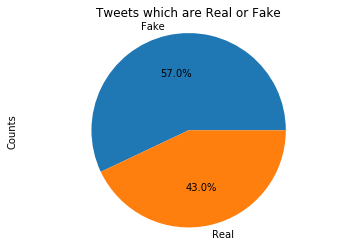

In [8]:
# Pie chart of Real vs Fake breakdown
real = len(train[train['target'] == 1])
fake = len(train[train['target'] == 0])

pie_chart = pd.DataFrame({
                          'Class': ['Real','Fake'],
                          'Counts': [real,fake]
                         }
                        )
pie_chart.Counts.groupby(pie_chart.Class).sum().plot(kind = 'pie',autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Tweets which are Real or Fake')
plt.show()

In [9]:
# Count words in each tweet
#count_vectorizer = feature_extraction.text.CountVectorizer()
tf_idf_vectorizer = TfidfVectorizer(use_idf=True)

In [13]:
#example_train_vector = count_vectorizer.fit_transform(train['text'][0:5])
example_train_vectors = tf_idf_vectorizer.fit_transform(train['text'][0:5])

In [17]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
first_vector = example_train_vectors[0]

df = pd.DataFrame(first_vector.T.todense(),index = tf_idf_vectorizer.get_feature_names(),columns=['tfidf'])
df.sort_values(by=['tfidf'],ascending = False)

,tfidf
our,0.289245
the,0.289245
forgive,0.289245
may,0.289245
earthquake,0.289245
deeds,0.289245
reason,0.289245
of,0.289245
allah,0.289245
us,0.289245


In [12]:
# 54 unique tokens/words in first 5 tweets
example_train_vector[0].todense().shape

['000',
 '13',
 'alaska',
 'all',
 'allah',
 'are',
 'as',
 'asked',
 'being',
 'by',
 'california',
 'canada',
 'deeds',
 'earthquake',
 'evacuation',
 'expected',
 'fire',
 'forest',
 'forgive',
 'from',
 'got',
 'in',
 'into',
 'just',
 'la',
 'may',
 'near',
 'no',
 'notified',
 'of',
 'officers',
 'or',
 'orders',
 'other',
 'our',
 'people',
 'photo',
 'place',
 'pours',
 'reason',
 'receive',
 'residents',
 'ronge',
 'ruby',
 'sask',
 'school',
 'sent',
 'shelter',
 'smoke',
 'the',
 'this',
 'to',
 'us',
 'wildfires']

In [23]:
#train_vectors = count_vectorizer.fit_transform(train['text'])
train_vectors = tf_idf_vectorizer.fit_transform(train['text'])

In [24]:
# what are the tokens
#print(count_vectorizer.get_feature_names())
print(tf_idf_vectorizer.get_feature_names())

['00', '000', '0000', '007npen6lg', '00cy9vxeff', '00end', '00pm', '01', '02', '0215', '02elqlopfk', '02pm', '03', '030', '033', '034', '039', '03l7nwqdje', '04', '05', '05th', '06', '060', '061', '06jst', '07', '073izwx0lb', '08', '0840728', '0853', '087809233445', '0880', '08lngclzsj', '09', '0abgfglh7x', '0ajisa5531', '0blkwcupzq', '0btniwagt1', '0bvk5tub4j', '0c1y8g7e9p', '0cr74m1uxm', '0cxm5tkz8y', '0dqjeretxu', '0drqlrsgy5', '0dxvz7fdh3', '0erisq25kt', '0f8xa4ih1u', '0fekgyby5f', '0fs9ksv5xk', '0ghk693egj', '0gidg9u45j', '0gknpy4lua', '0h7oua1pns', '0iw6drf5x9', '0iyuntxduv', '0jfnvaxfph', '0jmkdtcymj', '0kccg1bt06', '0keh2treny', '0krw1zyahm', '0l', '0la1aw9uud', '0llwuqn8vg', '0lmheaex9k', '0lpu0gr2j0', '0m1tw3datd', '0mcxc68gzd', '0migwcmtje', '0mnpcer9no', '0npzp', '0nr4dpjgyl', '0oms8ri3l1', '0pamznyyuw', '0q040stkcv', '0r03c6njli', '0rny349unt', '0rokdutyun', '0rsverlztm', '0s6ydfrwdq', '0sa6xx1oq7', '0scnwe8xbv', '0szwlwl9qu', '0t8vqkeari', '0t9yd557ry', '0tslqjokvh', '0tz

In [25]:
train[train['target'] == 1]['text'].values[4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

In [26]:
# to make sure train and test use same tokens, use transform on test
#test_vectors = count_vectorizer.transform(test['text'])
test_vectors = tf_idf_vectorizer.transform(test['text'])

In [27]:
# Assuming a linear connection between tweet words and whether they're about a real disaster or not

# Ridge Regression to overcome overfitting by generalizing and increasing bias by introducng an alpha to adjust the line that trains on data 
# Increasing alpha makes model less sensitive to variation
clf = linear_model.RidgeClassifier()


In [29]:
# Use cross validation to see how well it trains on various portions of training data

scores = model_selection.cross_val_score(clf,train_vectors, train['target'],cv = 3,scoring ='f1')
scores
 
# Ridge Regression w/ countvectorizer: averages around 58-64% accuracy 
# Ridge Regression w/ tfidfvectorizer: averages around 61-68% accuracy

array([0.63516484, 0.6122449 , 0.68407835])

In [30]:
clf.fit(train_vectors, train['target'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [31]:
sample_submission = pd.read_csv('sample_submission.csv')

In [32]:
sample_submission['target'] = clf.predict(test_vectors)

In [33]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [34]:
sample_submission.to_csv('submisssion.csv',index = False)

In [35]:
tester = pd.read_csv('tester.csv')

In [37]:
#tester_vectors = count_vectorizer.transform(tester['text'])
tester_vectors = tf_idf_vectorizer.transform(tester['text'])

In [38]:
tester['target'] = clf.predict(tester_vectors)

In [39]:
tester

,id,keyword,location,text,target
0,0.0,NaN,NaN,rock!,0
1,1.0,NaN,NaN,paper!,0
2,2.0,NaN,NaN,scissors!,0
3,3.0,NaN,NaN,wildfire,1
4,NaN,NaN,NaN,i drew a wildfire on paper,1
5,NaN,NaN,NaN,this wildfire was made by paper,1
